In [77]:
# Import General Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [78]:
# Load the Dataset

data = pd.read_csv('titanic_data.csv')

In [79]:
# Head of the Dataset

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
# Description of the Dataset

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

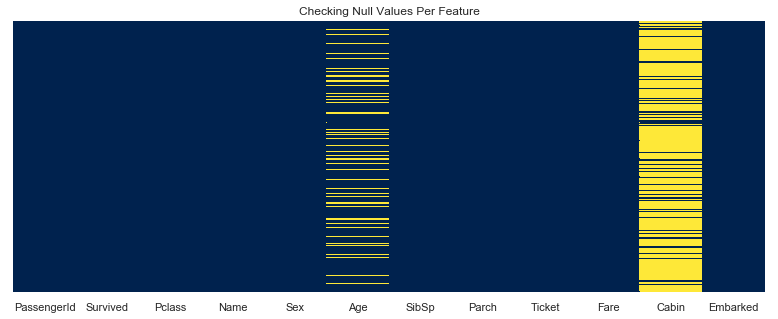

In [82]:
# Checking any null values in the Dataset

plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')
plt.title('Checking Null Values Per Feature')
plt.xticks(rotation=0)

From above we can clearly see that Age,Cabin and Embarked features has null values.As 'Embarked' has very few null, we'll ignore it.'Age' has about 70% of the values missing, we'll see if we want this feature or not later. But as we can see 'Cabin' feature is mostly compromised to null values, we'll drop this feature.

Notice that Name and Ticket is also not useful for us. So, we'll drop them as well.

In [83]:
# Droping the invaluable features

data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [84]:
# Looking at the Data Again

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Looking at each feature individually

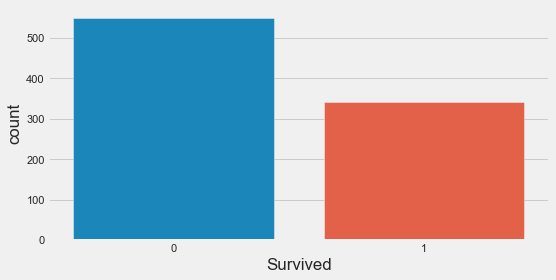

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.countplot(data['Survived'],data=data)

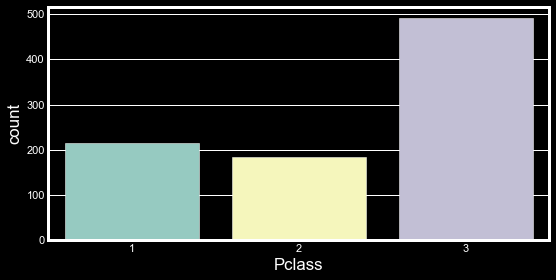

In [86]:
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
sns.countplot(data['Pclass'])

Text(0.5,1,'Sex to Age Demographics')

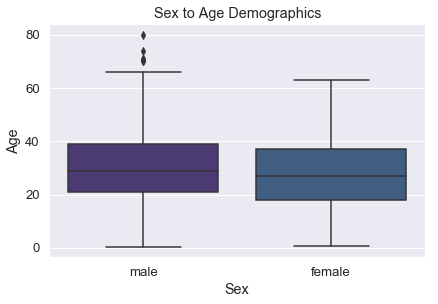

In [87]:
sns.set(palette='viridis',font_scale=1.2)
sns.boxplot(data['Sex'],data['Age'])
plt.title('Sex to Age Demographics')

Text(0.5,1,'Class To Fare Distribution')

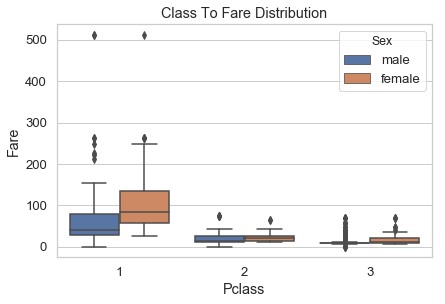

In [88]:
sns.set(style='whitegrid',font_scale=1.2)
sns.boxplot(data['Pclass'],data['Fare'],hue=data['Sex'])
plt.title('Class To Fare Distribution')

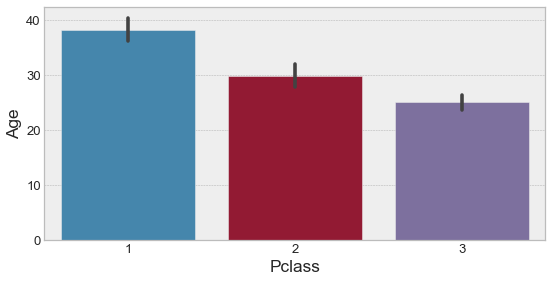

In [89]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,4))
plt.style.use('bmh')
sns.barplot(data['Pclass'],data['Age'])

From this Visualization, we can see that older people tend to buy more costly tickets.

In [90]:
print(int(round(data[data['Pclass']==1]['Age'].mean(),0)))
print(int(round(data[data['Pclass']==2]['Age'].mean(),0)))
print(int(round(data[data['Pclass']==3]['Age'].mean(),0)))

38
30
25


In [91]:
def age(pa):
    age=pa[0]
    Pclass=pa[1]
    if pd.isnull(age):
        
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else:   
        return age

In [92]:
data['Age'] = data[['Age','Pclass']].apply(age,axis=1)

In [93]:
# Looking at the data again
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

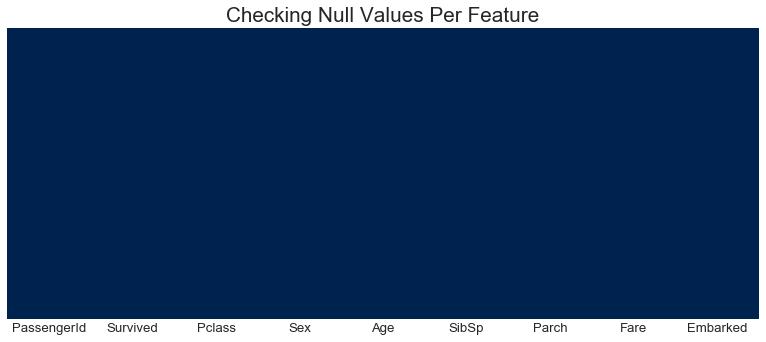

In [94]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')
plt.title('Checking Null Values Per Feature')
plt.xticks(rotation=0)

Text(0.5,1,'Age Demographics')

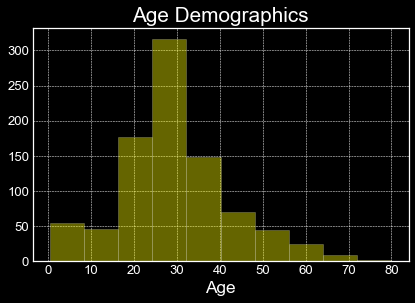

In [95]:
plt.style.use('dark_background')
# sns.set(style='dark')
sns.distplot(data['Age'],kde=False,color='yellow',bins=10)
plt.title('Age Demographics')

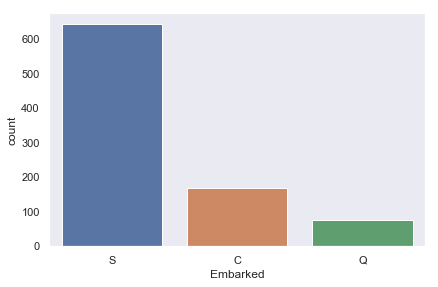

In [96]:
sns.set(style='dark')
sns.countplot(data['Embarked'])

In [97]:
survived = []
male_len = len(data[(data['Sex']=='male') & (data['Survived']==1)])
female_len = len(data[(data['Sex']=='female') & (data['Survived']==1)])
survived.append(male_len)
survived.append(female_len)

In [98]:
survived

[109, 233]

Text(0.5,1,'Male/Female Survival Rate')

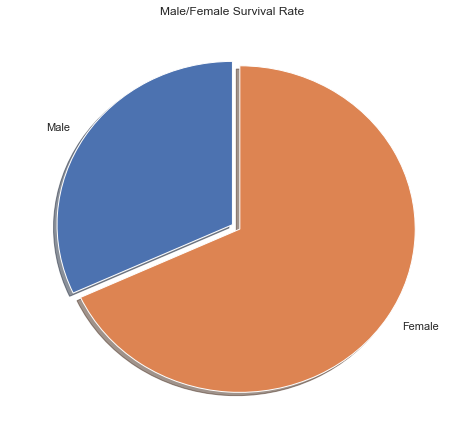

In [99]:
plt.figure(figsize=(7,7))
plt.pie(survived,labels=['Male','Female'],explode=[0,0.05],startangle=90,shadow=True)
plt.title('Male/Female Survival Rate')

In [100]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


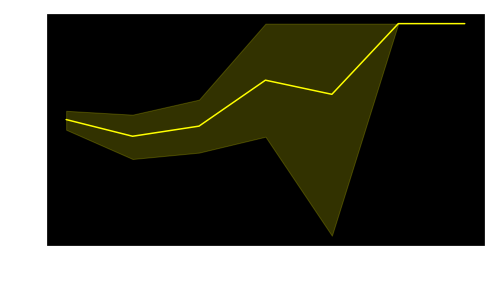

In [101]:
plt.figure(figsize=(7,4))
plt.style.use('dark_background')
sns.lineplot(x=data['Parch'],y=data['Pclass'],color='yellow')

Text(0.5,1,'Siblings Demographics')

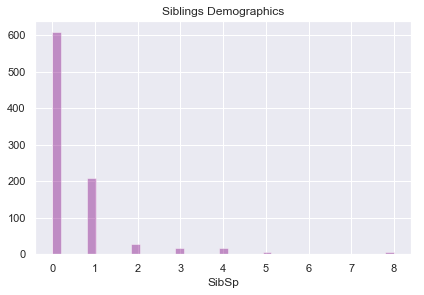

In [102]:
sns.set(style='darkgrid')
sns.distplot(data['SibSp'],kde=False,color='purple')
plt.title('Siblings Demographics')

# Applying Machine Learning Algo

In [103]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


As we can see 'Sex' and 'Embarked' features are categorical, we need to change them into numerical data through converting them into dummies

In [109]:
data['Sex'] = pd.get_dummies(data['Sex'],drop_first=True)

In [111]:
data[['Embarked_Q','Embarked_S']]=pd.get_dummies(data['Embarked'],drop_first=True)

In [112]:
# looking at the data ones again
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,S,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,1
4,5,0,3,1,35.0,0,0,8.0500,S,0,1


In [117]:
data.drop('Embarked',axis=1,inplace=True)

In [118]:
# Converting data into X and y

X = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [119]:
X[:3]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         1.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,
         0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         1.    ]])

In [120]:
y[:3]

array([0, 1, 1], dtype=int64)

In [121]:
# Splitting the data into testing data and Training data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [122]:
X_train.shape

(668, 8)

In [123]:
X_test.shape

(223, 8)

In [124]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [125]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
y_pred = log_model.predict(X_test)

In [127]:
y_pred[:3]

array([1, 0, 0], dtype=int64)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.88      0.81       137
          1       0.74      0.56      0.64        86

avg / total       0.75      0.75      0.74       223



In [130]:
confusion_matrix(y_test,y_pred)

array([[120,  17],
       [ 38,  48]], dtype=int64)

In [132]:
accuracy_score(y_test,y_pred)*100

75.33632286995515

In [145]:
from sklearn.metrics import roc_curve,roc_auc_score

In [146]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

In [147]:
probs = log_model.predict_proba(X_test)
probs = probs[:, 1]

Text(0.5,1,'ROC Curve')

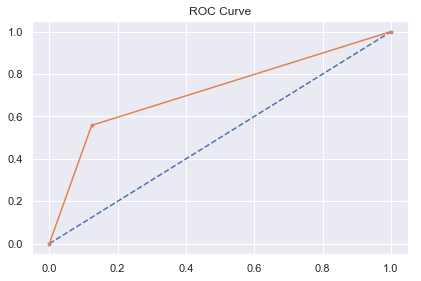

In [151]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')

In [153]:
print('Area Under the Curve : {:.2f}'.format(roc_auc_score(y_test,probs)))

Area Under the Curve : 0.81


In [154]:
Auccuary_Model = {'LogisticRegression':75.33}
Area_Model = {'LogisticRegression':0.81}

In [156]:
# Implementing K Nearest Algo

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [157]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [158]:
y_pred = knn_model.predict(X_test)

In [159]:
y_pred[:3]

array([1, 0, 1], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79       137
          1       0.68      0.52      0.59        86

avg / total       0.72      0.72      0.71       223



In [161]:
confusion_matrix(y_test,y_pred)

array([[116,  21],
       [ 41,  45]], dtype=int64)

In [165]:
accuracy_score(y_test,y_pred)*100

72.19730941704036

In [166]:
Auccuary_Model['KNeighborsClassifier'] = accuracy_score(y_test,y_pred)*100

In [168]:
probs = knn_model.predict_proba(X_test)[:,1]

In [170]:
probs[:5]

array([0.8, 0.2, 0.6, 0. , 0. ])

In [171]:
fpr,tpr,threshold = roc_curve(y_test,probs)

Text(0.5,1,'ROC Curve of KNeighborsClassifier')

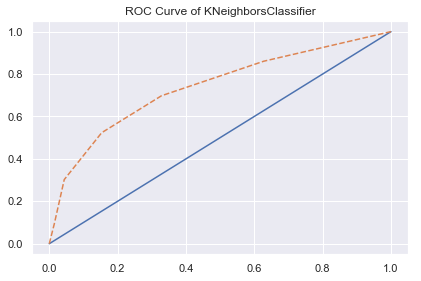

In [176]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,'--')
plt.title('ROC Curve of KNeighborsClassifier')

In [178]:
print('Area under ROC Curve : {:.2f}'.format(roc_auc_score(y_test,probs)))

Area under ROC Curve : 0.74


In [302]:
Area_Model['KNeighborsClassifier'] = 0.74

In [270]:
# Decision Trees Algo

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,accuracy_score
score = make_scorer(accuracy_score)
# dt_model = DecisionTreeClassifier()
params = {'max_depth':[2,5,10,15,20,30],'min_samples_split':[2,5,10,15,20,25]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),params,score)

In [271]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 5, 10, 15, 20, 30], 'min_samples_split': [2, 5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [272]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [273]:
grid.best_score_

0.812874251497006

In [274]:
# Applying DecisionTreeClassifier with above configration

dt_model = DecisionTreeClassifier(max_depth=5,min_samples_split=10)

In [275]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [276]:
y_pred = dt_model.predict(X_test)

In [277]:
y_pred[:3]

array([1, 0, 0], dtype=int64)

In [278]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.92      0.85       137
          1       0.82      0.59      0.69        86

avg / total       0.80      0.79      0.79       223



In [279]:
accuracy_score(y_test,y_pred)

0.7937219730941704

In [280]:
Auccuary_Model['DecisionTreeClassifier'] = 79.37

In [291]:
probs = dt_model.predict_proba(X_test)[:,1]

In [296]:
fpr,tpr,threshold = roc_curve(y_test,probs)

Text(0.5,1,'ROC Curve for DecisionTreeClassifier')

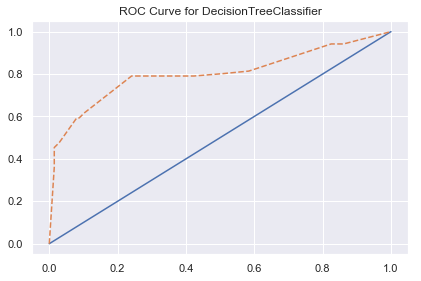

In [297]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,'--')
plt.title('ROC Curve for DecisionTreeClassifier')

In [299]:
print('Area under the DecisionTreeClassifier is : {:.2f}'.format(roc_auc_score(y_test,probs)))

Area under the DecisionTreeClassifier is : 0.80


In [305]:
Area_Model['DecisionTreeClassifier'] = 0.80

In [306]:
# Applying AdaBoost

from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [307]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [308]:
y_pred = ada_model.predict(X_test)

In [309]:
y_pred[:3]

array([1, 0, 0], dtype=int64)

In [311]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       137
          1       0.78      0.66      0.72        86

avg / total       0.80      0.80      0.79       223



In [312]:
confusion_matrix(y_test,y_pred)

array([[121,  16],
       [ 29,  57]], dtype=int64)

In [313]:
accuracy_score(y_test,y_pred)

0.7982062780269058

In [314]:
Auccuary_Model['AdaBoostClassifier'] = 79.8

In [319]:
probs = ada_model.predict_proba(X_test)[:,1]

In [320]:
fpr,tpr,threshold = roc_curve(y_test,probs)

Text(0.5,1,'ROC Curve of AdaBoostClassifier')

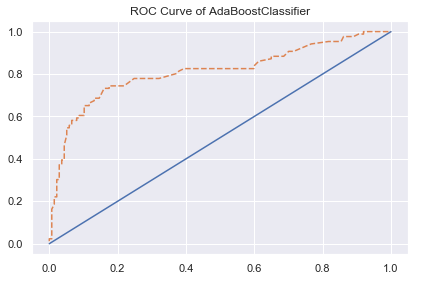

In [321]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,'--')
plt.title('ROC Curve of AdaBoostClassifier')

In [323]:
print('Area Under AdaBoostClassifier : {:.2f}'.format(roc_auc_score(y_test,probs)))

Area Under AdaBoostClassifier : 0.81


In [324]:
Area_Model['AdaBoostClassifier'] = 0.81

In [337]:
acc = pd.Series(Auccuary_Model)

In [338]:
area = pd.Series(Area_Model)

Text(0.5,1,'Accuracy Score for different Classification Models')

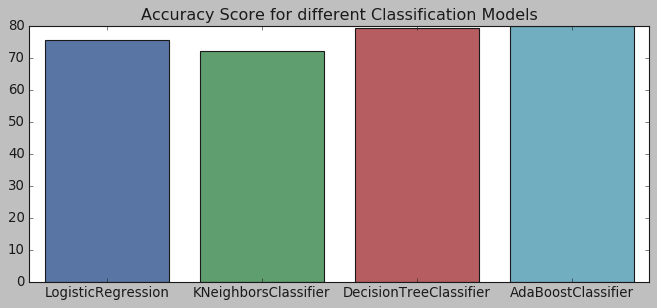

In [347]:
plt.figure(figsize=(10,4))
plt.style.use('classic')
sns.barplot(acc.index,acc.values)
plt.title('Accuracy Score for different Classification Models')

Text(0.5,1,'Area under ROC Curve for different Classification Models')

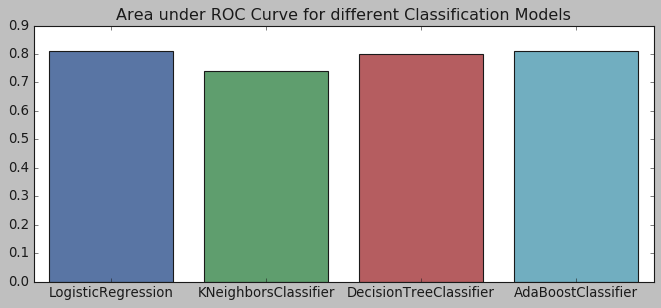

In [353]:
plt.figure(figsize=(10,4))
plt.style.use('classic')
sns.barplot(area.index,area.values)
plt.title('Area under ROC Curve for different Classification Models')

In [354]:
# From Above We can see that AdaBoostClassifier has best overall accuracy_score and area under the curve.

# Titanic Survival Prediction is Done!!!